In [21]:
!pip install vectorhub[encoders-text-sentence-transformers] --quiet
!pip install -U relevanceai --quiet
!pip install simpletransformers --quiet
!pip3 install torch torchvision torchaudio

In [22]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import time
from vectorhub.encoders.text.sentence_transformers import SentenceTransformer2Vec
import relevanceai
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# import PyTorch as torch

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
%cd /content/drive/
%cd My\ Drive/
%cd NLP
%ls

/content/drive
/content/drive/My Drive
[Errno 2] No such file or directory: 'NLP'
/content/drive/My Drive
'Academic Statement.gdoc'
'assignment_4(vsm).py.gdoc'
'Business_Analyst-_JD (1).docx.gdoc'
'Copy of ECE 651 Spring 2022 Project Task List.gsheet'
'Covaxin Certificate Passport.pdf'
'Covaxin Dose 1.pdf'
'Covaxin final certificate .pdf'
'DeepMind Answers.gdoc'
 Details.gdoc
 DM/
 DS/
'Education loan'/
 fac/
'family pics'/
'Final thesis_14123018 (1).pdf'
'Final thesis_14123018.pdf'
'FMS SOP.docx'
 GRE/
'hall tickets'/
 idf_matrix.py.gdoc
 IMG-20190228-WA0009.jpg
 IMG-20190228-WA0010.jpg
 Internships.gsheet
 kasi-antharyami.pdf
'Lavanya LOR 2.0.gdoc'
'Lavanya LOR Header.gdoc'
 Machine_learning_complete/
'mess list.pdf'
'ML Notes'/
'MP1 Slide Doc.gslides'
'MTP-Network Community Detection'/
'Mukku LOR 2.0.gdoc'
'Mukku LOR.gdoc'
 Nag-Ramya/
 OG621200030.pdf
'Placements 2018-19 (1).xlsx'
'posting list.py.gdoc'
'Power of Attorney Document swetha copy.docx'
'Power of Attorney Document swetha

In [28]:
train_data = pd.read_csv('data-mc.csv')
train_data.head()


FileNotFoundError: ignored

In [27]:
train_data.shape


FileNotFoundError: ignored

In [ ]:
subset = train_data.sample(frac=0.15)

In [ ]:
subset.shape

(180, 4)

In [ ]:
model = SentenceTransformer2Vec("bert-base-uncased")
train_dict = subset.to_dict('records')
encoded_stories = model.encode_documents(['story'], train_dict)
encoded_questions = model.encode_documents(['question'], train_dict)

/usr/local/lib/python3.7/dist-packages/vectorhub/base.py:110: UserWarning: We have not tested this url. Please use URL at your own risk.Please use the is_url_working method to test if this is a working url if this is not a local directory.
  "this is not a local directory.", UserWarning)
/usr/local/lib/python3.7/dist-packages/vectorhub/encoders/text/sentence_transformers/sentence_auto_transformers.py:91: UserWarning: Not included in the official model repository. Please specify set the vector length attribute.
  warnings.warn("Not included in the official model repository. Please specify set the vector length attribute.")
Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'c

In [ ]:
df = pd.DataFrame(encoded_stories)
df_vectors = pd.DataFrame(np.column_stack(list(zip(*df[['story_sentence_transformers_vector_']].values))))
df_vectors.index = df['story']
df_vectors.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
story,,,,,,,,,,,,,,,,,,,,,
"Ralph was an alligator that loved to splash around in the water. Ralph had three brothers, named Henry, Larry, and Thomas. But none of Ralph's three brothers liked to play in the water. They were very mean brothers, but the meanest of them all was Henry. Henry would always chase Ralph around the lake and try to beat him up when he was splashing around. Then on his birthday, Ralph thought of a great idea. His idea was to stop Henry from beating him by using a trick. He would trick Henry into thinking one side of the lake was scary. Ralph dressed up in a spooky costume and waited for Henry to swim over to the side of the lake. Then when Henry came over, Ralph started making spooky sounds and scared Henry back to the other side of the lake. Henry was so scared he never came to the other side of the lake again and Ralph was free to splash around in peace.",-0.393273,0.056978,-0.057505,0.147677,0.111546,-0.155232,0.268848,0.921905,-0.155232,-0.320502,...,-0.281094,0.142034,-0.038279,-0.285791,-0.149904,-0.000435,0.066607,0.012310,0.348877,0.191295
"Robin's First Flight\newline\newlineRobin was a little baby bird who was born only 6 weeks before. Her mother took care of her and her brothers and sister by feeding them bugs and worms. Robin had 2 brothers. She also had one sister. During this time, Robin grew and grew and got stronger and stronger. Her feathers got longer, too. \newline\newlineThe day had finally come when mother bird told Robin and her brothers and sister that they would be learning to fly for the first time. Chirps of joy were heard from all the baby birds. All except for Robin. She was too afraid to fly out into the world. She wanted to stay in her comfy nest with all of her family for the rest of her life. She also wanted her mother to feed her for the rest of her life. Mother bird told Robin how exciting it was to fly and see all the beautiful flowers and trees and told her she would help her learn like she did when she was a baby bird. She told her that she would meet lots of other bird friends, too. \newline\newlineSo Robin tried not to be scared, even as she saw both of her brothers and sister fly off the nest and out into the world. They looked so happy. Then it was her turn. She spread her wings, closed her eyes and jumped out of the nest. After a few seconds, she opened her eyes to see that she was actually flying. Oh happy day! It was everything her mother said it would be. The world looked so big and Robin couldn't wait to see it all.",-0.118195,-0.072154,0.125340,0.023738,0.229356,-0.023527,0.256363,0.812608,-0.290893,-0.241506,...,-0.349505,0.209106,0.025269,-0.359470,-0.209925,-0.134084,-0.051632,-0.072379,0.257479,-0.044815
"Johnny walked toward the time machine. His adult neighbor, the scientist, had asked him to watch it for him for the weekend. He had also asked Johnny not to touch it. But it was a time machine. Johnny had to see it.\newline\newlineThe machine was big and silver and shiny and looked like an ice cream cone that had been dropped. It had a square hole as tall as Johnny and it hummed like a fridge.\newline\newlineJohnny took a deep breath and stepped inside. Just a peek, he thought.\newline\newlineThere were three buttons inside. One said ""past,"" and one said ""present."" Another said ""space.""\newline\newlineJohnny looked at the buttons. He looked at the buttons some more. He waited and without thinking, his arm jumped out in front of him. He pushed the button that said ""past.""\newline\newlineThere was a bright light! And bam!\newline\newlineJohnny stepped out of the machine. It was raining, and there were many strange looking trees. The air was warm. The dirt below was muddy.\newline\newlineHe took a deep breath. ""So this is the past,"" Johnny said.\newline\newlineJust then he heard a bump. And another one. The ground shook. The bumps got louder and the ground shook harder. A tree fell.

In [ ]:
df_ques = pd.DataFrame(encoded_questions)
df_vectors_ques = pd.DataFrame(np.column_stack(list(zip(*df[['question_sentence_transformers_vector_']].values))))
df_vectors_ques.index = df['question']
df_vectors_ques.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
question,,,,,,,,,,,,,,,,,,,,,
How did Ralph trick Henry into thinking the lake was scary?,0.173314,0.032799,-0.358120,0.004341,0.203781,-0.311740,0.486345,0.643463,-0.189172,-0.036454,...,0.019652,-0.068702,0.079435,-0.283874,0.073666,0.140891,0.032575,-0.028939,0.207915,0.140628
How come baby bird have didn't want to leave the nest?,0.323053,-0.152177,-0.044617,0.121665,0.241244,-0.117973,0.180101,0.477203,-0.232415,-0.082512,...,-0.009850,0.277600,-0.065178,-0.084585,-0.160802,-0.487935,-0.062785,-0.213878,0.065587,-0.140859
What button did Johnny push?,0.060171,-0.013650,0.017755,-0.113460,0.237186,0.128984,0.234588,0.249655,-0.399362,-0.064493,...,-0.079371,-0.023861,0.207505,-0.240666,0.081948,0.107852,0.080845,-0.081871,0.241548,-0.157757
What did Mark get that day?,-0.052313,-0.152579,-0.263176,0.059577,0.202699,-0.239054,-0.082942,0.787034,-0.239549,0.038725,...,-0.042545,-0.030176,0.217749,-0.102921,0.194346,-0.068760,-0.133321,-0.087432,0.056817,-0.465052
What is the name of Josh's dog?,0.038078,0.063588,-0.199841,-0.295347,0.328588,0.207697,0.194660,0.349850,-0.353683,0.047650,...,-0.115390,0.056999,0.119353,-0.158157,-0.079641,-0.165764,-0.129775,-0.316218,0.369033,-0.101716


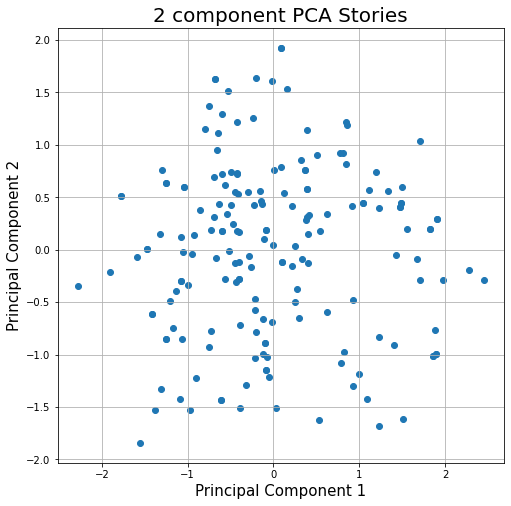

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_vectors.values)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = principalDf
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA Stories', fontsize = 20)
ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'])
ax.grid()

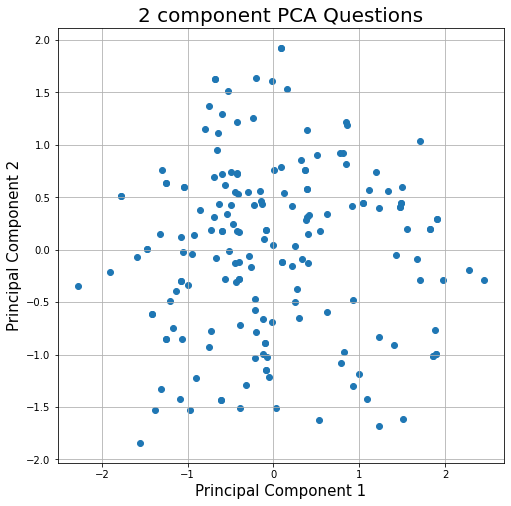

In [ ]:
pca_q = PCA(n_components=2)
principalComponents_q = pca_q.fit_transform(df_vectors_ques.values)
principalDf_q = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf_q = principalDf_q
fig_q = plt.figure(figsize = (8,8))
ax_q = fig_q.add_subplot(1,1,1) 
ax_q.set_xlabel('Principal Component 1', fontsize = 15)
ax_q.set_ylabel('Principal Component 2', fontsize = 15)
ax_q.set_title('2 component PCA Questions', fontsize = 20)
ax_q.scatter(finalDf_q['principal component 1'], finalDf_q['principal component 2'])
ax_q.grid()

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
import torch

tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small")

# the following 2 hyperparameters are task-specific
max_source_length = 512
max_target_length = 128
input_sequences = []
output_sequences = []

for row in train_data:
  input_sequences = np.append(input_sequences, row[2])
  output_sequences = np.append(output_sequences, row[1])

# encode the inputs
task_prefix = "Ask question: "
#input_sequences = [input_sequence_1, input_sequence_2]
encoding = tokenizer(
    [task_prefix + sequence for sequence in input_sequences],
    padding="longest",
    max_length=max_source_length,
    truncation=True,
    return_tensors="pt",
)
input_ids, attention_mask = encoding.input_ids, encoding.attention_mask

# encode the targets
target_encoding = tokenizer(
    ['' + output for output in output_sequences], 
    padding="longest", 
    max_length=max_target_length, 
    truncation=True
)
labels = target_encoding.input_ids

# replace padding token id's of the labels by -100
labels = torch.tensor(labels)
labels[labels == tokenizer.pad_token_id] = -100

# forward pass
loss = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels).loss

In [ ]:
eval_data = pd.read_csv('data-validation.csv')

In [ ]:
train_data['prefix'] = 'Ask question:'
train_data.rename(columns = {'story':'input_text', 'question':'target_text'}, inplace = True)
eval_data['prefix'] = 'Ask question:'
eval_data.rename(columns = {'story':'input_text', 'question':'target_text'}, inplace = True)

In [16]:
!pip install transformers --quiet
!pip install PyTorch --quiet
import PyTorch as torch
from transformers import(
    AutoModelForSeq2SeqLM, 
    AutoTokenizer,
    PreTrainedModel,
    PreTrainedTokenizer,
)

model = PreTrainedModel
tokenizer = PreTrainedTokenizer
device = "cuda" if torch.cuda.is_available() and use_cuda else "cpu"
#model.to(device)

def _tokenize(
        inputs,
        padding=True,
        truncation=True,
        add_special_tokens=True,
        max_length=512
    ):
        inputs = tokenizer.batch_encode_plus(inputs, 
            max_length=max_length,
            add_special_tokens=add_special_tokens,
            truncation=truncation,
            padding="max_length" if padding else False,
            pad_to_max_length=padding,
            return_tensors="pt"
        )
        return inputs

def _generate_questions(inputs):
        inputs = _tokenize(inputs, padding=True, truncation=True)
        
        outs = model.model.generate(
            input_ids=inputs['input_ids'].to(device), 
            attention_mask=inputs['attention_mask'].to(device), 
            max_length=32,
            num_beams=4,
        )
        
        questions = [model.tokenizer.decode(ids, skip_special_tokens=True) for ids in outs]
        return questions


questions = _generate_questions(input_sequences)
print(questions)

  ERROR: Failed building wheel for PyTorch
    Running setup.py install for PyTorch ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-20gknvfm/pytorch_e432869d8a99444a9c605ba62f7ed35c/setup.py'"'"'; __file__='"'"'/tmp/pip-install-20gknvfm/pytorch_e432869d8a99444a9c605ba62f7ed35c/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-ef4u7lhx/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/PyTorch Check the logs for full command output.


ModuleNotFoundError: ignored

In [ ]:
from simpletransformers.t5 import T5Model

model_args = {
    "reprocess_input_data": True,
    "overwrite_output_dir": True,
    "max_seq_length": 128,
    "train_batch_size": 4,
    "num_train_epochs": 20,
    "save_eval_checkpoints": True,
    "save_steps": -1,
    "use_multiprocessing": False,
    "evaluate_during_training": True,
    "evaluate_during_training_steps": 15000,
    "evaluate_during_training_verbose": True,
    "fp16": False,

    "wandb_project": "Question Generation with T5",
}

model = T5Model("t5", "t5-small", args=model_args, use_cuda=False)
model.train_model(train_data, eval_data=eval_data)

KeyError: ignored

In [ ]:
input_ids = tokenizer("Ask question: Mary had a little lamb. Her lamb was three years old. Mary loved her lamb. The name of the lamb was Molly.", return_tensors="pt").input_ids
outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

Ask question: Mary had a little lamb. Her lamb was three years old. Mary loved


In [ ]:
task_prefix = "Ask question: "
sentences = eval_data['input_text']  # use different length sentences to test batching
inputs = tokenizer([task_prefix + sentence for sentence in sentences], return_tensors="pt", padding=True)

output_sequences = model.generate(
    input_ids=inputs["input_ids"],
    attention_mask=inputs["attention_mask"],
    do_sample=False,  # disable sampling to test if batching affects output
)

print(tokenizer.batch_decode(output_sequences, skip_special_tokens=True))

Token indices sequence length is longer than the specified maximum sequence length for this model (538 > 512). Running this sequence through the model will result in indexing errors


KeyboardInterrupt: ignored